In [17]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [19]:
from pandas.io.data import DataReader

In [25]:
from datetime import datetime, timedelta

In [26]:
from __future__ import division

In [27]:
active_list = ['WFC','NFLX','VZ','FB']

In [31]:
#grabbing date from 2 years ago

n = 365 

end = datetime.now() - timedelta(days=n)

start = datetime(end.year - 1,end.month,end.day)

In [32]:
for stock in active_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [33]:
WFC.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,53.577470,53.928419,53.268735,53.585889,1.528672e+07,51.451218
std,2.121822,2.103686,2.131353,2.119785,5.545543e+06,2.409117
min,47.180000,48.520000,46.439999,47.849998,4.297000e+06,45.579641
25%,51.730000,52.029999,51.410000,51.689999,1.183730e+07,49.237443
50%,53.950001,54.279999,53.619999,53.830002,1.439040e+07,51.662979
75%,55.169998,55.560001,54.869999,55.330002,1.734670e+07,53.259559
max,58.000000,58.259998,57.759998,57.910000,4.585150e+07,56.271866


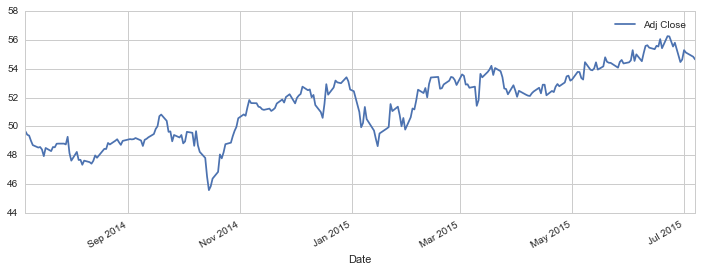

In [34]:
WFC['Adj Close'].plot(legend=True,figsize=(12,4))

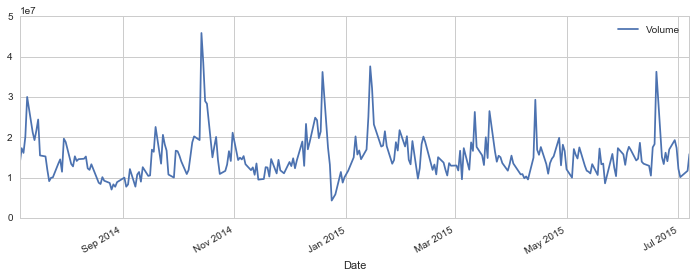

In [35]:
WFC['Volume'].plot(legend=True,figsize=(12,4))

In [36]:
#calculating the simple moving average, aka the average sans noise (big price fluctuations)

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    WFC[column_name] = pd.rolling_mean(WFC['Adj Close'],ma)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


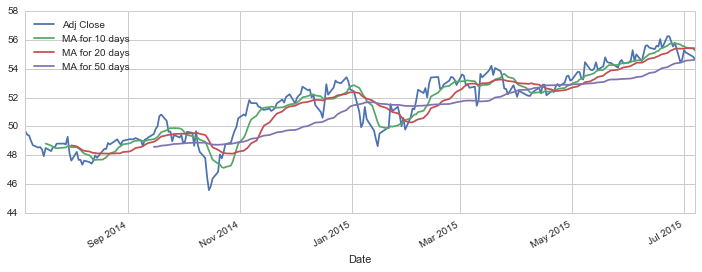

In [37]:
WFC[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,4))

In [38]:
WFC['Daily Return'] = WFC['Adj Close'].pct_change()

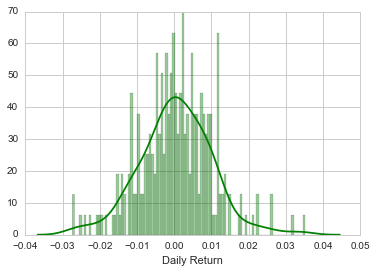

In [39]:
# plotting daily average return with histogram and kde plot, dropna to get rid of Null Values

sns.distplot(WFC['Daily Return'].dropna(),bins=100,color='green')

In [40]:
closing_df = DataReader(active_list,'yahoo',start,end)['Adj Close']

In [41]:
closing_df.head()

,FB,NFLX,VZ,WFC
Date,,,,
2014-07-07,65.290001,65.802856,45.369512,49.661726
2014-07-08,62.759998,63.578571,44.945497,49.425241
2014-07-09,64.970001,63.285713,45.074547,49.368484
2014-07-10,64.870003,62.650002,45.756655,49.009030
2014-07-11,66.339996,62.851429,46.383459,48.706330


In [42]:
active_rets = closing_df.pct_change()

In [43]:
active_rets.dropna().head()

,FB,NFLX,VZ,WFC
Date,,,,
2014-07-08,-0.038750,-0.033802,-0.009346,-0.004762
2014-07-09,0.035214,-0.004606,0.002871,-0.001148
2014-07-10,-0.001539,-0.010045,0.015133,-0.007281
2014-07-11,0.022661,0.003215,0.013699,-0.006176
2014-07-14,0.023515,0.028684,0.004173,-0.003496


//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


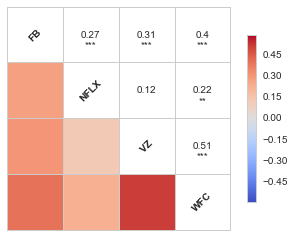

In [44]:
sns.corrplot(active_rets.dropna(),annot=True)

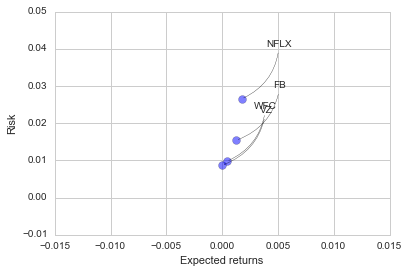

In [45]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = active_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)


#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

-0.015198877590675109

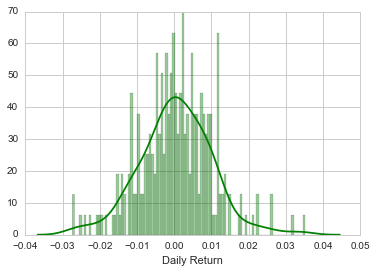

In [47]:
WFC['Daily Return'] = WFC['Adj Close'].pct_change()

sns.distplot(WFC['Daily Return'].dropna(),bins=100,color='green')

rets['WFC'].quantile(0.05)

# with 95 percent confidence, you worst daily loss should not exceed 0.0151 percent 
# 0.0151 * 10,000 = $151

In [74]:
import math

std = np.std(WFC['Daily Return']) 

annual_std = std * np.sqrt(250) #time

max_annual_loss = -1.65 * annual_std * np.sqrt(250)

max_annual_loss

-4.0145275305391772

-0.024385187098792026

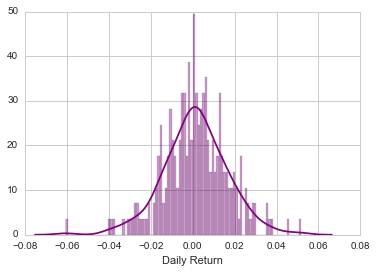

In [49]:
FB['Daily Return'] = FB['Adj Close'].pct_change()

sns.distplot(FB['Daily Return'].dropna(),bins=100,color='purple')

rets['FB'].quantile(0.05)

# with 95 percent confidence your maximum daily loss should not exceed 0.024 percent
# 0.024 * 10000 = $240

In [75]:
import math

std = np.std(FB['Daily Return']) 

annual_std = std * np.sqrt(250) #time

max_annual_loss = -1.65 * annual_std * np.sqrt(250)

max_annual_loss

-6.3384283306959812

-0.029350450504367347

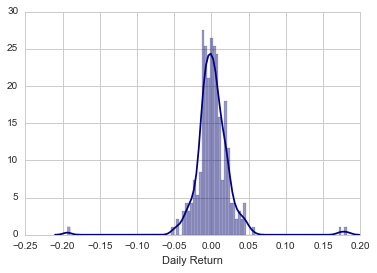

In [51]:
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()

sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='navy')

rets['NFLX'].quantile(0.05)

# with 95 percent confidence, your maximum daily loss should not exceed 0.029 percent
# 0.029 percent * 10,000 = $290

In [76]:
import math

std = np.std(NFLX['Daily Return']) 

annual_std = std * np.sqrt(250) #time

max_annual_loss = -1.65 * annual_std * np.sqrt(250)

max_annual_loss

-10.927923707820561

-0.013672142705314328

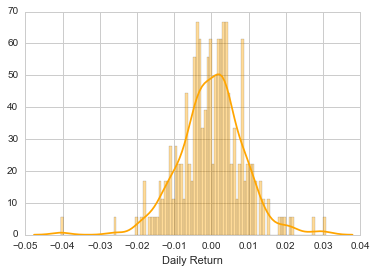

In [53]:
VZ['Daily Return'] = VZ['Adj Close'].pct_change()

sns.distplot(VZ['Daily Return'].dropna(),bins=100,color='orange')

rets['VZ'].quantile(0.05)

# with 95 percent confidence, your maximum daily loss should not exceed 0.014
# 0.014 * 10,000 = $140

In [78]:
import math

std = np.std(VZ['Daily Return']) 

annual_std = std * np.sqrt(250) #time

max_annual_loss = -1.65 * annual_std * np.sqrt(250)

max_annual_loss

-3.5804268946761844